# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from scipy import stats
from statsmodels.stats.weightstats import ztest
from matplotlib import rcParams

critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate and construct a statistically sound analysis and make recommendations of your own

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [4]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [5]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [6]:
hospital_read_df.describe()

,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,16860.000000,3129.000000,13731.000000,13731.000000,13731.000000,11497.000000
mean,263516.943654,2.905401,1.002582,16.916532,16.866135,63.633731
std,160146.191702,2.074384,0.091088,6.197542,5.989652,59.540296
min,10001.000000,1.000000,0.549500,2.700000,2.900000,11.000000
25%,110181.500000,1.000000,0.949500,15.200000,15.800000,24.000000
50%,250157.000000,1.000000,0.997100,18.500000,18.500000,45.000000
75%,390138.250000,5.000000,1.052350,21.100000,21.100000,82.000000
max,670091.000000,7.000000,1.909500,32.800000,29.400000,879.000000


In [7]:
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']

In [8]:
hospital_read_df[hospital_read_df['Number of Discharges']== 'Not Available'].sum() 

Hospital Name                 DOCTORS HOSPITAL AT DEER CREEK LLCPARK RIDGE H...
Provider Number                                                      1459458832
State                         LANCGAWIMACAPAINPAGAMNINNYNMMIGAMATXWIVAMACAVA...
Measure Name                  READM-30-HIP-KNEE-HRRPREADM-30-HIP-KNEE-HRRPRE...
Number of Discharges          Not AvailableNot AvailableNot AvailableNot Ava...
Footnote                                                                   8524
Excess Readmission Ratio                                                2183.19
Predicted Readmission Rate                                              25515.5
Expected Readmission Rate                                                 26187
Number of Readmissions                                                        0
Start Date                    07/01/201007/01/201007/01/201007/01/201007/01/...
End Date                      06/30/201306/30/201306/30/201306/30/201306/30/...
dtype: object

In [9]:
clean_hospital_read_df.loc[:, 'Number of Discharges']=clean_hospital_read_df['Number of Discharges'].astype(int) 
 #meaning?iloc? 

In [10]:
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
# print(clean_hospital_read_df)
# I made the switch to ascending = False from the one given on the problem , ascending = False

In [11]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [12]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


In [13]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


****
## Preliminary Analysis

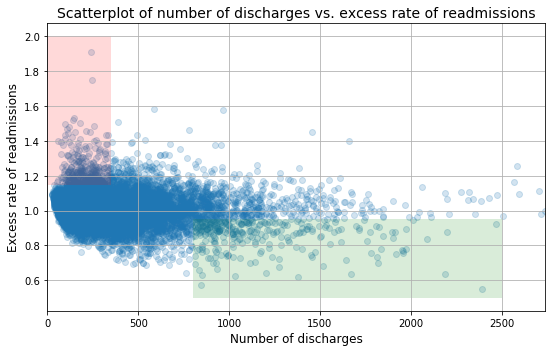

In [14]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]] #readon for the last 81 rows was due to not having
# , ascending = False from the assignment initially???
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

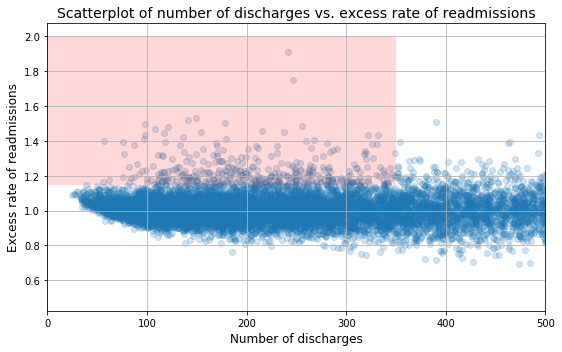

In [15]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]] #readon for the last 81 rows was due to not having
# , ascending = False from the assignment initially???
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, 500])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges --
No, there is no factor of time to assess this

+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red) --
No, there is no red shaded in the area  of lower number of discharges. Therefore, not necessarily! most of the data is clumped up on the lower number of discharge but it could have any excess readmission 
ratio

+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) --
Yes, it seems correct

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

Not entirely because analysis was soley based on graph. 

1) Initial observations is based on plot alone and not tested for statistical significance and correlation coefficient was not calculated.

2) There is no "Hypothesis test" done  In the statistical analysis and hospital capacity was grouped only into two: number of discharges 1000. The group of 100 <=number of discharges<=1000 was left out. This means the calculated percentages of hospitals with excess readmission rate (63% and 44%) is only for the two groups missing a big chunk of the hospitals in the population.

3) In the statistics part, hospital capacity was divided in two groups which can imply that small hospitals have number of discharges <100. However in the recommendation part, small capacity hospitals was defined as hospitals with number of discharges <300 which is inconsistent and can create confusion.

# B. Statistics
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

We are going to assess the following: 
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1

In [17]:
clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100].tail()


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
200,SAINT JOSEPH REGIONAL MEDICAL CENTER - PLYMOUTH,150076,IN,READM-30-HIP-KNEE-HRRP,99,NaN,1.2348,7.2,5.8,11.0,07/01/2010,06/30/2013
2722,ADVOCATE TRINITY HOSPITAL,140048,IL,READM-30-AMI-HRRP,99,NaN,1.0671,20.6,19.3,24.0,07/01/2010,06/30/2013
4982,MILFORD REGIONAL MEDICAL CENTER,220090,MA,READM-30-AMI-HRRP,99,NaN,1.0248,21.8,21.3,23.0,07/01/2010,06/30/2013
7560,BERWICK HOSPITAL CENTER,390072,PA,READM-30-PN-HRRP,99,NaN,0.9878,16.9,17.1,16.0,07/01/2010,06/30/2013
4449,LAKE MARTIN COMMUNITY HOSPITAL,10052,AL,READM-30-PN-HRRP,99,NaN,1.0337,18.2,17.6,20.0,07/01/2010,06/30/2013


In [18]:
clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]['Excess Readmission Ratio'].head()
#reset_index(drop=True)    

16857   NaN
14582   NaN
15606   NaN
15615   NaN
14551   NaN
Name: Excess Readmission Ratio, dtype: float64

In [19]:
clean_hospital_read_df["Excess Readmission Ratio"][(clean_hospital_read_df["Number of Discharges"] < 100)].dropna().head()
#Excess Readmission Ratio, Length: 1188, dtype: float64
#reset_index(drop=True)

1832    1.0914
1699    1.0961
1774    1.0934
1853    1.0908
1290    1.1123
Name: Excess Readmission Ratio, dtype: float64

In [20]:
clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']].dropna().head()

,Number of Discharges,Excess Readmission Ratio
1832,25,1.0914
1699,27,1.0961
1774,28,1.0934
1853,29,1.0908
1290,30,1.1123


In [21]:
clean_hospital_read_df.columns #['Number of Discharges','Excess Readmission Ratio']

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

In [22]:
df = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']].dropna()

In [23]:
print(df.head())

      Number of Discharges  Excess Readmission Ratio
1832                    25                    1.0914
1699                    27                    1.0961
1774                    28                    1.0934
1853                    29                    1.0908
1290                    30                    1.1123


In [24]:
print(df.columns)

Index(['Number of Discharges', 'Excess Readmission Ratio'], dtype='object')


In [25]:
sum(df.columns.isna())

0

In [26]:
np.mean(df["Excess Readmission Ratio"][(df["Number of Discharges"] < 100)])


1.0226183501683506

In [27]:
df["Excess Readmission Ratio"][(df["Number of Discharges"] < 100)].describe()
#what does the count mean here? 1188? total no of observations. total no of rows

count    1188.000000
mean        1.022618
std         0.057979
min         0.893500
25%         0.984900
50%         1.017750
75%         1.052925
max         1.495300
Name: Excess Readmission Ratio, dtype: float64

Having calculated the above cell, we see that the Number of Dischares of less than 100 has a mean access Readmission Ratio of 1.023

In [28]:
sum(df['Number of Discharges'][(df["Excess Readmission Ratio"] > 1)])
# what does this mean?  this the total number of discharges for which ERR >1

2082526

In [29]:
sum(df['Number of Discharges'])

4201765

In [30]:
sum(df['Number of Discharges'][(df["Excess Readmission Ratio"] > 1)])/sum(df['Number of Discharges'])

0.4956312406809995

The above calculations show 50% of the Number of Discharges has Excess Readmission Ratio of larger than 1

In [31]:
sum(df['Number of Discharges'][(df["Excess Readmission Ratio"] < 1)])

2116399

In [32]:
sum(df['Number of Discharges'][(df["Excess Readmission Ratio"] < 1)])/sum(df['Number of Discharges'])

0.5036928528844427

In [33]:
df_s = df["Excess Readmission Ratio"][(df["Number of Discharges"] < 100)] #second one is the filter and the ERR is my metric
df_s.describe()  #count is how many rows are in the series

count    1188.000000
mean        1.022618
std         0.057979
min         0.893500
25%         0.984900
50%         1.017750
75%         1.052925
max         1.495300
Name: Excess Readmission Ratio, dtype: float64

In [34]:
print(df_s)

1832     1.0914
1699     1.0961
1774     1.0934
1853     1.0908
1290     1.1123
1602     1.0992
2048     1.0847
2441     1.0738
2512     1.0720
2825     1.0651
3828     1.0444
5125     1.0228
3312     1.0548
2378     1.0756
2670     1.0683
2944     1.0622
1238     1.1149
1395     1.1082
3145     1.0581
3207     1.0570
1471     1.1043
1838     1.0912
4092     1.0398
2252     1.0784
3087     1.0593
4317     1.0359
5309     1.0203
2952     1.0621
3406     1.0530
738      1.1468
          ...  
6793     0.9981
1504     1.1029
10683    0.9426
10373    0.9484
10034    0.9538
10000    0.9544
960      1.1317
1586     1.1002
11659    0.9218
3417     1.0528
7318     0.9913
7503     0.9886
7911     0.9834
7005     0.9953
8043     0.9815
12012    0.9125
8191     0.9797
3088     1.0592
3638     1.0478
4332     1.0357
8481     0.9761
8739     0.9724
8308     0.9781
11697    0.9209
5742     1.0137
200      1.2348
2722     1.0671
4982     1.0248
7560     0.9878
4449     1.0337
Name: Excess Readmission

In [35]:
sum(df_s)  #what does this mean? is this the sum of all ERR for hospitals of no of dischrges <100

1214.8706000000004

In [36]:
len(df_s) # no of observ

1188

In [37]:
len(df_s[(df["Excess Readmission Ratio"] > 1)])

751

In [38]:
len(df["Number of Discharges"] < 100)  # what does this number mean? creates true and false 

11497

In [39]:
value_s = len(df_s[(df["Excess Readmission Ratio"] > 1)])/len(df_s)

In [40]:
print(value_s)

0.6321548821548821


The above calculations verify that 63% of the population in the less than 100 number of discharges has  excess readmission rate 
of greater than 1. 

We are now going to assess the following: 
    
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

In [41]:
np.mean(df["Excess Readmission Ratio"][(df["Number of Discharges"] > 1000)])


0.9783354211663071

The above statement about hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 is correct. Now let's verify the rest of the original statement

In [42]:
df_l = df["Excess Readmission Ratio"][(df["Number of Discharges"] > 1000)]
df_l.describe()

count    463.000000
mean       0.978335
std        0.120007
min        0.549500
25%        0.907900
50%        0.986400
75%        1.057100
max        1.454300
Name: Excess Readmission Ratio, dtype: float64

In [43]:
value_l = len(df_l[(df["Excess Readmission Ratio"] > 1)])/len(df_l)
print(value_l)

0.4449244060475162


The above few cells verify both that the hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1